In [1]:
%matplotlib inline
import matplotlib.style as style

import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

import scqubits as scq
import qutip as qt

from PulseSequence import PulseSequence
from QSwitch import QSwitch

style.use('default')
plt.rcParams['figure.figsize'] = [9.7, 6]
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scq.settings.PROGRESSBAR_DISABLED = True

In [2]:
hbar = 1.054e-34
h = hbar*2*np.pi
qe = 1.602e-19
red_flux_quant = hbar/2/qe 

# Unit conversions
MHz = 10.0**(-3)
GHz = 1.0
kHz = 10.0**(-6)
us = 10.0**3
ns = 1.0

In [62]:
# q_in, q_switch, q_out1, q_out2
# EJs = [21, 20, 22, 21.5]
# ECs = [0.25, 0.35, 0.35, 0.28]
# gs = [0.1, 0.1, 0.1] # g12, g23, g24
EJs = [15, 13, 10, 14]
ECs = [0.23, 0.14, 0.27, 0.21]
gs = [0.070, 0.070, 0.070] # g12, g23, g24

cutoffs = [4, 5, 4, 4]
isCavity = [False, False, False, False]

qram = QSwitch(
    EJs=EJs,
    ECs=ECs,
    gs=gs,
    cutoffs=cutoffs,
    isCavity=isCavity,
)

qubit_freqs = qram.qubit_freqs
alphas = qram.alphas
print('qubit freqs (GHz)', *qubit_freqs)
print('alphas (GHz)', *alphas)


print('capacitances (fF)', *(qe**2/(2*h*np.array(ECs)*1e9)*1e15))
print('lumped L (nH)', *(red_flux_quant**2/h/np.array(EJs)))

qubit freqs (GHz) 5.012115353630303 3.6700468279160487 4.3588734272610345 4.629414197452709
alphas (GHz) -0.258689797999029 -0.15398642601951007 -0.32110528764252066 -0.23582517390303437
capacitances (fF) 84.24550007648143 138.4033215542195 71.76468525033603 92.26888103614634
lumped L (nH) 10.893927197929974 12.56991599761151 16.34089079689496 11.672064854924972


In [63]:
# MAKE SURE DRESSED STATES ARE MAPPED CORRECTLY, AT LEAST FOR <= n EXCITATIONS
qram.check_state_mapping(n=3)

100%|██████████| 320/320 [00:58<00:00,  5.50it/s]

Good enough for dressed states mappings. :)


In [64]:
seq = PulseSequence(start_time=0)
# wd1 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.17)
# wd2 = qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.01)
# wd3 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.08)
# wd4 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', wd=wd1, amp=0.17)
# wd5 = qram.add_sequential_pi_pulse(seq, 'ggeg', 'geeg', amp=0.01) # should be same as wd2
# wd6 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.01)
# wd7 = qram.add_sequential_pi_pulse(seq, 'ggge', 'gege', amp=0.01) # should be same as wd2 and should also drive geeg -> ggeg


print('wd1')
wd1 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.15, drive_qubit=1)
print('wd2')
wd2 = qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.05, drive_qubit=1)
print('wd3')
wd3 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.05, drive_qubit=1)
print('wd4')
# wd4 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.10, drive_qubit=1)
wd4 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.15, drive_qubit=1, wd=wd1)
print('wd5')
wd5 = qram.add_sequential_pi_pulse(seq, 'ggeg', 'geeg', amp=0.05, drive_qubit=1)
print('wd6')
wd6 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.05, drive_qubit=1)
print('wd7')
wd7 = qram.add_sequential_pi_pulse(seq, 'ggge', 'gege', amp=0.05, drive_qubit=1)

wd1
	new overlap 0.7405517564691745 wd 13.46866290023113
	new overlap 0.7405517564691745 wd 13.46866290023113
	new overlap 0.9667254689331091 wd 13.45866290023113
	new overlap 0.989875637579559 wd 13.45666290023113
updated drive freq (GHz) from 2.1436042774102075 to 2.141694418093105
wd2
	new overlap 0.9654903621584603 wd 22.946453549053444
	new overlap 0.9752897356649606 wd 22.996453549053445
	new overlap 0.9754626087780331 wd 23.006453549053447
	new overlap 0.9754757271045923 wd 23.004453549053448
updated drive freq (GHz) from 3.652041508760421 to 3.6612724954597513
wd3
	new overlap 0.9001927463739492 wd 17.55367244420033
	new overlap 0.9001927463739492 wd 17.55367244420033
	new overlap 0.9203725645258478 wd 17.54367244420033
	new overlap 0.9937455271098607 wd 17.54767244420033
updated drive freq (GHz) from 2.793753738910475 to 2.7927988092519236
wd4
wd5
	new overlap 0.9620351628708399 wd 22.878361987256667
	new overlap 0.9730739610074193 wd 22.928361987256668
	new overlap 0.97339713

In [65]:
# CHECK FOR CLASHING LEVELS
tolerance = 100*MHz
problem_pulses = qram.check_level_resonances(seq, tolerance=tolerance)
good_freqs = seq.get_pulse_freqs(simplified=True)
print(good_freqs)
if len(problem_pulses.items()) == 0:
    print(f'No clashes found within {tolerance} GHz!')
for good_pulse, problem_pulse_dict in problem_pulses.items():
    print('Clashes to', tolerance,'GHz with', good_pulse[0], '<->', good_pulse[1], f'(freq = {good_freqs[good_pulse]})', 'tpi', qram.get_Tpi(good_pulse[0], good_pulse[1], amp=0.05))
    for problem_pulse, freq in problem_pulse_dict.items():
        diff_freq = np.abs(freq)-np.abs(good_freqs[good_pulse])
        if np.abs(diff_freq) > tolerance:
            diff_freq = 2*np.abs(freq)-np.abs(good_freqs[good_pulse])
        print('\t', problem_pulse[0], '<->', problem_pulse[1], freq, f'(off by {diff_freq*1e3} MHz)', 'tpi', qram.get_Tpi(problem_pulse[0], problem_pulse[1], amp=0.05))

{('eggg', 'gfgg'): 2.141694418093105, ('eegg', 'eggg'): 3.6612724954597513, ('gfgg', 'ggeg'): 2.7927988092519236, ('geeg', 'ggeg'): 3.6507536967031307, ('gfgg', 'ggge'): 2.5245775919848845, ('gege', 'ggge'): 3.6591900623312794}
Clashes to 0.1 GHz with eegg <-> eggg (freq = 3.6612724954597513) tpi 10.101647918768546
	 eegg <-> ghgg -1.8453238765334352 (off by 29.37525760711912 MHz) tpi 947.3676173883713


[2.141694418093105, 3.6612724954597513, 2.7927988092519236, 2.141694418093105, 3.6507536967031307, 2.5245775919848845, 3.6591900623312794] (GHz)
[447.9598148932753, 10.101647918768546, 422.2203433545035, 447.9598148932753, 10.30289407347956, 730.3220039509029, 10.125583607094153] (ns)
total pulse length 2078.992102691299 ns


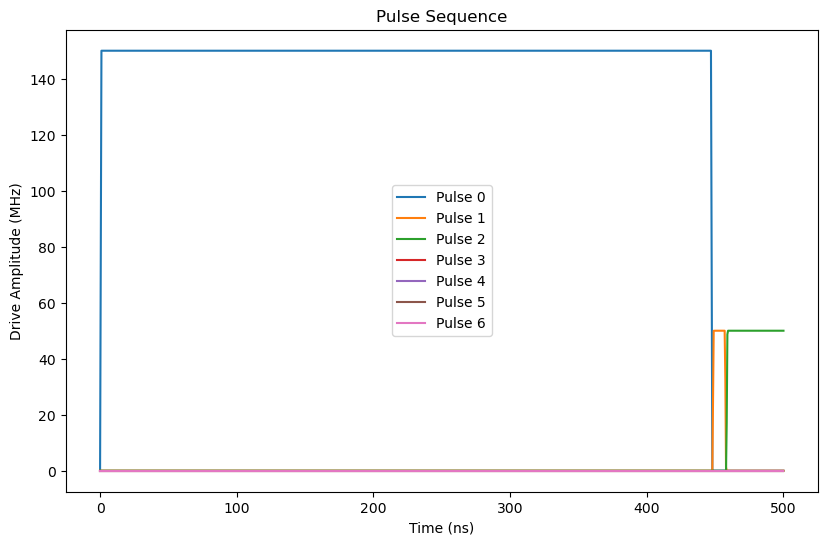

In [66]:
times = np.linspace(0, 500, 1000)
# times = np.linspace(0, 750, 1000)
# times = np.linspace(0, 300, 700)
# times = np.linspace(0, 50, 100)

envelope_seq = seq.get_envelope_seq()
print(seq.get_pulse_freqs(), '(GHz)')
print(seq.get_pulse_lengths(), '(ns)')
print('total pulse length', sum(seq.get_pulse_lengths()), 'ns')
for i in range(len(envelope_seq)):
    plt.plot(times, [envelope_seq[i](t)/MHz for t in times], label=f'Pulse {i}')
plt.xlabel('Time (ns)')
plt.ylabel('Drive Amplitude (MHz)')
plt.title('Pulse Sequence')
plt.legend()
plt.show()

In [69]:
# incl_dissipation = True
incl_dissipation = False

T1 = 60e3 # ns
T2 = 30e3 # ?

# T1 = 10e3

c_ops = [
    np.sqrt(1/T1)*qram.a,
    np.sqrt(1/T1)*qram.b,
    np.sqrt(1/T1)*qram.c,
    np.sqrt(1/T1)*qram.d,
]

In [70]:
# psi0_name = 'eggg'
# psi0_name = 'gfgg'
# psi0_name = 'efgg'
# psi0_name = 'eegg'
# psi0_name = 'ggeg'
# psi0_name = 'ggge'

# psi0 = qram.state(psi0_name)
psi0 = np.sqrt(0.4) * qram.state('eggg') + np.sqrt(0.6) * qram.state('eegg') # QRAM start
# psi0 = np.sqrt(0.4) * qram.state('gggg') + np.sqrt(0.6) * qram.state('gegg') # QRAM start

# print(seq.get_pulse_str())

if incl_dissipation:
    full_result = qt.mcsolve(qram.H_solver_str(seq), psi0, times, c_ops, progress_bar=True, options=qt.Options(nsteps=10000))
    result = np.sum(full_result.states, axis=0)/full_result.ntraj
else:
    # result = qt.mesolve(qram.H_solver(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=10000)).states
    result = qt.mesolve(qram.H_solver_str(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=12000)).states

10.0%. Run time:  13.40s. Est. time left: 00:00:02:00
20.0%. Run time:  26.58s. Est. time left: 00:00:01:46
30.0%. Run time:  39.22s. Est. time left: 00:00:01:31
40.0%. Run time:  51.54s. Est. time left: 00:00:01:17
50.0%. Run time:  64.11s. Est. time left: 00:00:01:04
60.0%. Run time:  76.76s. Est. time left: 00:00:00:51
70.0%. Run time:  89.10s. Est. time left: 00:00:00:38
80.0%. Run time: 102.25s. Est. time left: 00:00:00:25
90.0%. Run time: 117.68s. Est. time left: 00:00:00:13
Total run time: 133.08s


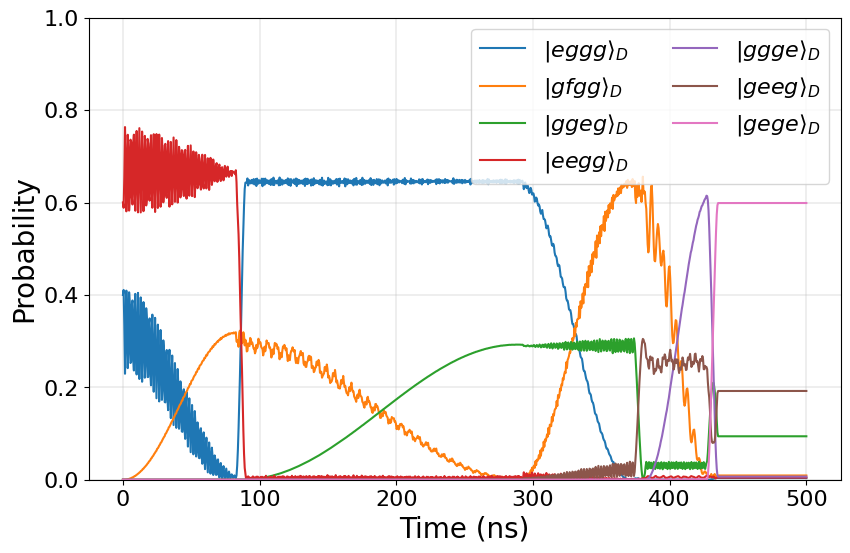

In [71]:
# states for 1 input
eggg = qram.state('eggg')
gfgg = qram.state('gfgg')
ggeg = qram.state('ggeg')
eegg = qram.state('eegg')
ggge = qram.state('ggge')
geeg = qram.state('geeg')
gege = qram.state('gege')
prob_eggg = [np.abs(eggg.overlap(result[t]))**2 for t in range(len(times))]
prob_gfgg = [np.abs(gfgg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggeg = [np.abs(ggeg.overlap(result[t]))**2 for t in range(len(times))]
prob_eegg = [np.abs(eegg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggge = [np.abs(ggge.overlap(result[t]))**2 for t in range(len(times))]
prob_geeg = [np.abs(geeg.overlap(result[t]))**2 for t in range(len(times))]
prob_gege = [np.abs(gege.overlap(result[t]))**2 for t in range(len(times))]

# states for 0 input
gggg = qram.state('gggg')
gegg = qram.state('gegg')
prob_gggg = [np.abs(gggg.overlap(result[t]))**2 for t in range(len(times))]
prob_gegg = [np.abs(gegg.overlap(result[t]))**2 for t in range(len(times))]


plt.plot(times, prob_eggg, label=r'$|eggg\rangle_D$')
plt.plot(times, prob_gfgg, label=r'$|gfgg\rangle_D$')
plt.plot(times, prob_ggeg, label=r'$|ggeg\rangle_D$')
plt.plot(times, prob_eegg, label=r'$|eegg\rangle_D$')
plt.plot(times, prob_ggge, label=r'$|ggge\rangle_D$')
plt.plot(times, prob_geeg, label=r'$|geeg\rangle_D$')
plt.plot(times, prob_gege, label=r'$|gege\rangle_D$')

# plt.plot(times, prob_gggg, label=r'$|gggg\rangle_D$')
# plt.plot(times, prob_gegg, label=r'$|gegg\rangle_D$')

# plt.plot(times, [np.abs(state('geeg').overlap(result[t]))**2 for t in range(len(times))], 'k--', label=r'$|geeg\rangle_D$')
# plt.plot(times, [np.abs(state('efgg').overlap(result[t]))**2 for t in range(len(times))], 'k-.', label=r'$|efgg\rangle_D$')

# for i1 in range(cutoffs[0]):
#     for i2 in range(cutoffs[1]):
#         for i3 in range(cutoffs[2]):
#             for i4 in range(cutoffs[3]):
#                 # print(qram.levels_nums_to_name([i1, i2, i3, i4]))
#                 plt.plot(times, 
#                          [np.abs(qram.state([i1, i2, i3, i4]).overlap(result[t]))**2 for t in range(len(times))],
#                          label='qram.level_nums_to_name[i1, i2, i3, i4]')

# plt.plot(times, [0.5]*len(times), 'k--', linewidth=0.5)
plt.legend(fontsize=16, ncol=2)
plt.ylim(0, 1)
# plt.xlim(750, 1000)
plt.tick_params(labelsize=16)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Probability', fontsize=20)
# plt.title(r'$\psi_0=|$'+psi0_name+r'$\rangle$')
# plt.title('QRAM state evolution in memory access operation')
plt.grid(linewidth=0.3)
plt.show()

In [36]:
T = 30 # ns

sum_psi = 0
T = np.argmin(np.abs(times-T))
probs = dict()
print("Non-zero levels:")
for i1 in range(cutoffs[0]):
    for i2 in range(cutoffs[1]):
        for i3 in range(cutoffs[2]):
            for i4 in range(cutoffs[3]):
                prob = np.abs(qram.state([i1, i2, i3, i4]).overlap(result[T]))**2
                sum_psi += prob
                if prob > 0.01:
                    probs.update({qram.level_nums_to_name([i1, i2, i3, i4]):prob})
probs = sorted(probs.items(), key=lambda item:-item[1])
for level, prob in probs:
    print(level, prob)
print('Sum probabilities:', sum_psi)

Non-zero levels:
eegg 0.6777368568507433
eggg 0.3006184807431125
gfgg 0.01976445714818161
Sum probabilities: 1.0000000000153317


In [12]:
print('want', qram.get_base_wd('eggg', 'gfgg')/2/np.pi)
print('want', qram.get_base_wd('eegg', 'eggg')/2/np.pi)
# print('want', qram.get_wd('eggg', 'gfgg', 0.10, verbose=False)/2/np.pi)
# print('want', qram.get_wd('eegg', 'gfgg', 0.10, verbose=False)/2/np.pi)
# print('want', qram.get_wd('ggge', 'gege', 0.05, verbose=False)/2/np.pi)
# print('resonant to', qram.get_wd('ggeg', 'geeg', 0.05)/2/np.pi)
# print('2 photon transition to', qram.get_base_wd('eggg', 'efgg')/2/np.pi)

want 6.2192120533711
want 5.874104473311355
